<a href="https://www.javeriana.edu.co/inicio"><img src = "https://www.javeriana.edu.co/construye-futuro/wp-content/uploads/2021/02/javeriana-web-logo-edu.png" width = 600, align = "center"></a>

<h1>Regression Models with Neural Network</h1>

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Download and Clean Dataset</a>  
2. <a href="#item32">Import Keras</a>  
3. <a href="#item33">Build a Neural Network</a>  
4. <a href="#item34">Train and Test the Network</a>  

</font>
</div>

<a id="item31"></a>

## Download and Clean Dataset

Let's start by importing the <em>pandas</em> and the Numpy libraries.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


<h2 id="understanding_data">Understanding the Data</h2>

### `MY2022_Fuel_Consumption_Ratings.csv`:
We have downloaded a fuel consumption dataset, **`MY2022 Fuel Consumption Ratings.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2022
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. Compact
- **ENGINE SIZE** e.g. 2.4
- **CYLINDERS** e.g 4
- **TRANSMISSION** e.g. AM8
- **FUEL** e.g. Z

- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 7
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 8.6
- **CO2 EMISSIONS (g/km)** e.g. 200   --> 6
- **SMOG** e.g. 3

Let's download the data and read it into a <em>pandas</em> dataframe.

In [2]:
emissions_df = pd.read_csv("MY2022_Fuel_Consumption_Ratings.csv", encoding='cp1252',
                 nrows=882, usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14], index_col=False)
emissions_df.head()

,Make,Model,Vehicle Class,Engine_Size,Cylinders,Transmission,Fuel,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb_mpg,CO2_Emissions,CO2_Rating,Smog_Rating
0,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


So the first concrete sample has 540 cubic meter of cement, 0 cubic meter of blast furnace slag, 0 cubic meter of fly ash, 162 cubic meter of water, 2.5 cubic meter of superplaticizer, 1040 cubic meter of coarse aggregate, 676 cubic meter of fine aggregate. Such a concrete mix which is 28 days old, has a compressive strength of 79.99 MPa. 

#### Let's check how many data points we have.

In [3]:
emissions_df.shape

(882, 14)

So, there are approximately 1000 samples to train our model on. Because of the few samples, we have to be careful not to overfit the training data.

Let's check the dataset for any missing values.

In [4]:
emissions_df.describe()

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb_mpg,CO2_Emissions,CO2_Rating,Smog_Rating
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,3.117234,5.600907,12.392404,9.320295,11.009751,27.486395,257.041950,4.595238,5.004535
std,1.317316,1.941692,3.471466,2.306278,2.899504,7.802495,64.782264,1.479523,1.630436
min,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2.000000,4.000000,10.100000,7.600000,9.000000,22.000000,211.000000,4.000000,3.000000
50%,3.000000,6.000000,12.100000,9.100000,10.700000,26.000000,254.000000,5.000000,5.000000
75%,3.600000,6.000000,14.500000,10.600000,12.700000,31.000000,298.000000,5.000000,6.000000
max,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


In [5]:
emissions_df.isnull().sum()

Make                         0
Model                        0
Vehicle Class                0
Engine_Size                  0
Cylinders                    0
Transmission                 0
Fuel                         0
Fuel_Consumption_City        0
Fuel_Consumption_Hwy         0
Fuel_Consumption_Comb        0
Fuel_Consumption_Comb_mpg    0
CO2_Emissions                0
CO2_Rating                   0
Smog_Rating                  0
dtype: int64

The data looks very clean and is ready to be used to build our model.

#### Split data into predictors and target

The target variable in this problem is the concrete sample strength. Therefore, our predictors will be all the other columns.

In [6]:
predictors =  emissions_df[['Engine_Size','Cylinders','Fuel_Consumption_City','Fuel_Consumption_Hwy']]
target =  emissions_df['CO2_Emissions']

<a id="item2"></a>

Let's do a quick sanity check of the predictors and the target dataframes.

In [7]:
predictors.head()

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy
0,2.4,4,9.9,7.0
1,3.5,6,12.6,9.4
2,2.0,4,11.0,8.6
3,2.0,4,11.3,9.1
4,2.0,4,11.2,8.0


In [8]:
target.head()

0    200
1    263
2    232
3    242
4    230
Name: CO2_Emissions, dtype: int64

Finally, the last step is to normalize the data by substracting the mean and dividing by the standard deviation.

In [9]:
predictors_train,predictors_test,target_train,target_test = train_test_split(predictors, target, test_size=0.3, random_state=42)

In [10]:
predictors_train = StandardScaler().fit_transform(predictors_train)
predictors_test = StandardScaler().fit_transform(predictors_test)
predictors_train

array([[-0.87734126, -0.85294125, -1.02783519, -0.83166966],
       [-0.87734126, -0.85294125, -1.23329757, -1.31868795],
       [-0.12003914,  0.16992513,  0.58651208,  0.36373887],
       ...,
       [-0.87734126, -0.85294125, -0.20598567, -0.47747454],
       [-0.4986902 , -0.85294125, -0.70496574, -0.96449283],
       [ 0.94018384,  1.1927915 ,  1.05614038,  0.71793399]])

Let's save the number of predictors to *n_cols* since we will need this number when building our network.

In [11]:
n_cols = predictors_train.shape[1] # number of predictors

<a id="item1"></a>

<a id='item32'></a>

## Import Keras

Recall from the videos that Keras normally runs on top of a low-level library such as TensorFlow. This means that to be able to use the Keras library, you will have to install TensorFlow first and when you import the Keras library, it will be explicitly displayed what backend was used to install the Keras library. In CC Labs, we used TensorFlow as the backend to install Keras, so it should clearly print that when we import Keras.

#### Let's go ahead and import the Keras library

In [12]:
#!pip install keras
#!pip install tensorflow

In [13]:
import keras

As you can see, the TensorFlow backend was used to install the Keras library.

Let's import the rest of the packages from the Keras library that we will need to build our regressoin model.

In [14]:
from keras.models import Sequential
from keras.layers import Dense

<a id='item33'></a>

## Build a Neural Network

Let's define a function that defines our regression model for us so that we can conveniently call it to create our model.

In [15]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

The above function create a model that has two hidden layers, each of 50 hidden units.

<a id="item4"></a>

<a id='item34'></a>

## Train and Test the Network

Let's call the function now to create our model.

In [16]:
# build the model
model = regression_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


2022-02-27 03:12:28.834864: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-27 03:12:28.834900: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-27 03:12:28.834933: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:163] no NVIDIA GPU device is present: /dev/nvidia0 does not exist
2022-02-27 03:12:28.836148: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Next, we will train and test the model at the same time using the *fit* method. We will leave out 30% of the data for validation and we will train the model for 100 epochs.

In [17]:
# fit the model
history = model.fit(predictors_train, target_train, epochs=200, verbose=True, validation_data=(predictors_test, target_test))

2022-02-27 03:12:29.033356: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
20/20 [==============================] - 0s 8ms/step - loss: 70820.9922 - root_mean_squared_error: 266.1221 - val_loss: 67853.7422 - val_root_mean_squared_error: 260.4875
Epoch 2/200
20/20 [==============================] - 0s 3ms/step - loss: 70695.1328 - root_mean_squared_error: 265.8856 - val_loss: 67715.5469 - val_root_mean_squared_error: 260.2221
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 70543.2188 - root_mean_squared_error: 265.5997 - val_loss: 67547.2578 - val_root_mean_squared_error: 259.8986
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 70356.3438 - root_mean_squared_error: 265.2477 - val_loss: 67333.6016 - val_root_mean_squared_error: 259.4872
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 70120.0391 - root_mean_squared_error: 264.8019 - val_loss: 67073.7656 - val_root_mean_squared_error: 258.9860
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 69831.7344 -

In [18]:
# Evaluate model
train_score = model.evaluate(predictors_train, target_train, verbose=True)
test_score = model.evaluate(predictors_test, target_test, verbose=True)

9/9 [==============================] - 0s 868us/step - loss: 315.8472 - root_mean_squared_error: 17.7721


In [19]:
print("Validation:", test_score)
print("Training:  ", train_score)
print("--------------------")
print("First 5 samples validation:", history.history["val_loss"][0:5])
print("First 5 samples training:", history.history["loss"][0:5])


Validation: [315.84722900390625, 17.772090911865234]
Training:   [236.1981658935547, 15.36874008178711]
--------------------
First 5 samples validation: [67853.7421875, 67715.546875, 67547.2578125, 67333.6015625, 67073.765625]
First 5 samples training: [70820.9921875, 70695.1328125, 70543.21875, 70356.34375, 70120.0390625]


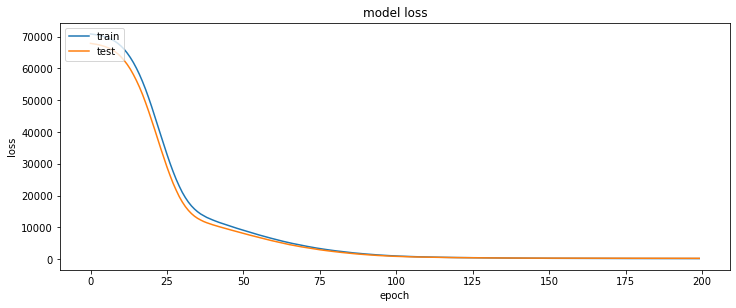

In [24]:
fig = plt.figure(figsize=(12, 10))

plt.subplot(211)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')

In [21]:
y_pred = model.predict(predictors_test, batch_size=None, verbose=True, steps=None, workers=1, use_multiprocessing=False)

9/9 [==============================] - 0s 1ms/step


In [22]:
r2_score(target_test, y_pred,)

0.9309740364305097